In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import beta, binom

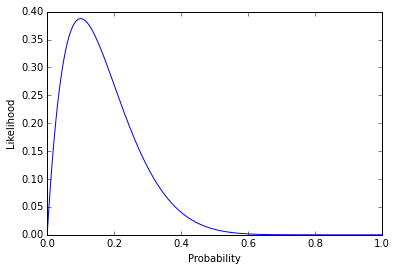

In [43]:
def likebin(y, N):
    rs = np.linspace(0, 1.0, 200)
    l = [binom.pmf(y, N, r) for r in rs]
    plt.plot(rs, l)
    plt.xlabel("Probability")
    plt.ylabel("Likelihood")
likebin(1, 10)

In [16]:
def betaupdate(a, b, y, N):
    rs = np.linspace(0, 1.0, 200)
    prior = [beta.pdf(r, a, b) for r in rs] 
    posterior = [beta.pdf(r, a + y, b + N - y) for r in rs]
    plt.plot(rs, prior, label = "Prior")
    plt.plot(rs, posterior, label = "Posterior")
    plt.legend(loc = "upper right")
    plt.xlabel("Probability")
    plt.ylabel("PDF")

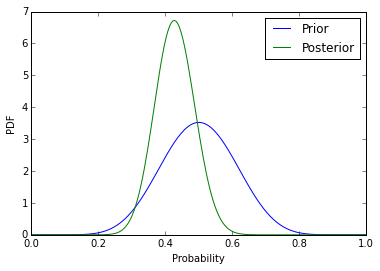

In [17]:
betaupdate(10.0, 10.0, 20.0, 50.0)

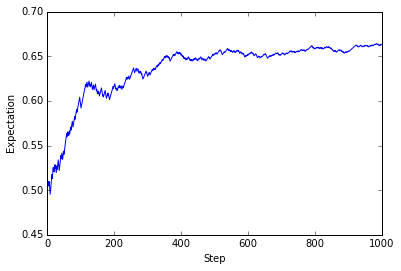

In [31]:
def exptrend(a, b, outcomes):
    alphas = [0.0] * (len(outcomes) + 1)
    betas = [0.0] * (len(outcomes) + 1)
    alphas[0] = a
    betas[0] = b
    for i in range(len(outcomes)):
        if outcomes[i] == "H":
            alphas[i + 1] = alphas[i] + 1
            betas[i + 1] = betas[i]
        else:
            alphas[i + 1] = alphas[i]
            betas[i + 1] = betas[i] + 1
    ev = [alphas[i]/(alphas[i] + betas[i]) for i in range(len(betas))]
    plt.plot(ev)
    plt.xlabel("Step")
    plt.ylabel("Expectation")
coins = np.random.choice(["H", "T"], size=1000, replace=True, p=[0.7, 0.3])
exptrend(50.0, 50.0, coins)

In [13]:
true_mu = 2.0
a = 0.0
b_sq = 1.0
sig_sq = 1.0
x = np.random.normal(true_mu, np.sqrt(sig_sq), (100, 1)) #10 by 1 vector from normal with mu 2.0 and sigma 1.0

In [6]:
def normal_pdf(x, mu, sigma):
    return (1.0 / (sigma * np.sqrt(2*np.pi))) * np.exp(-(1.0 / (2.0*sigma**2))*(x - mu)**2)

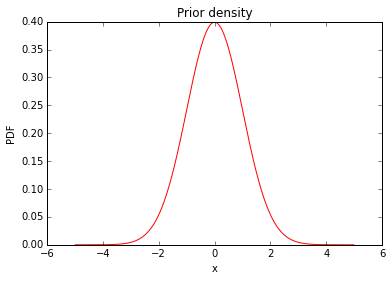

In [14]:
plotx = np.arange(-5, 5, 0.01)
plt.plot(plotx, normal_pdf(plotx, a, np.sqrt(b_sq)), "r")
plt.title("Prior density")
plt.xlabel("x")
plt.ylabel("PDF")

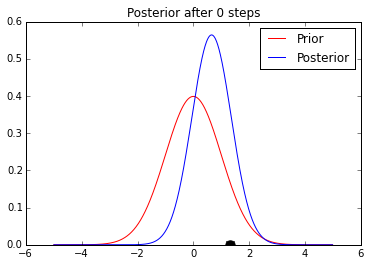

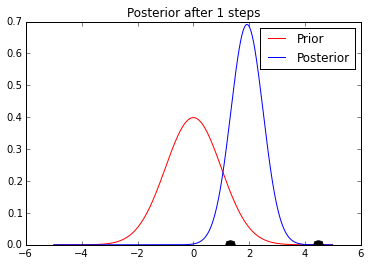

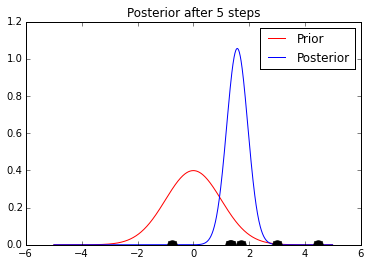

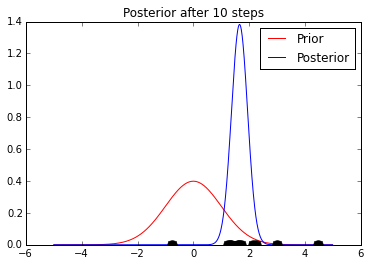

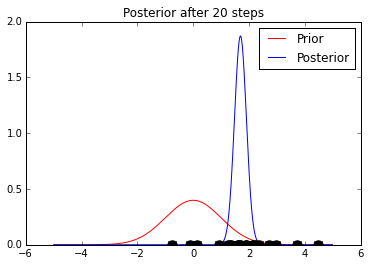

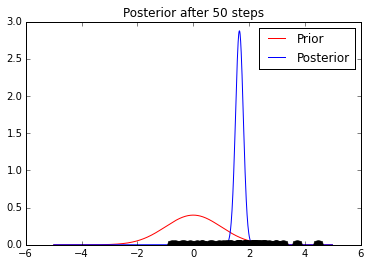

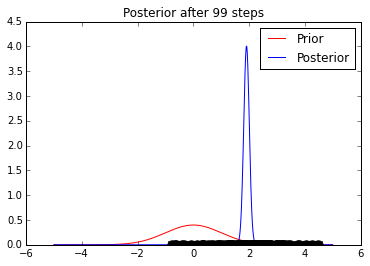

In [16]:
all_c = []
all_d_sq = []
plot_steps = [0, 1, 5, 10, 20, 50, x.size - 1]
for i in np.arange(x.size):
    d_sq = 1.0/(1.0/b_sq + (i + 1.0)/sig_sq)
    c = d_sq*(a / b_sq + x[0:i+1].sum()/sig_sq)
    all_c.append(c)
    all_d_sq.append(d_sq)
    if i in plot_steps:
        plt.figure()
        plt.plot(plotx, normal_pdf(plotx, a, np.sqrt(b_sq)), "r", label = "Prior")
        plt.plot(plotx, normal_pdf(plotx, c, np.sqrt(d_sq)), "b", label = "Posterior")
        plt.plot(x[0:i+1], np.zeros_like(x[0:i+1]), "ko", markersize = 10)
        plt.legend(loc = "best")
        plt.title("Posterior after %i steps" %i)

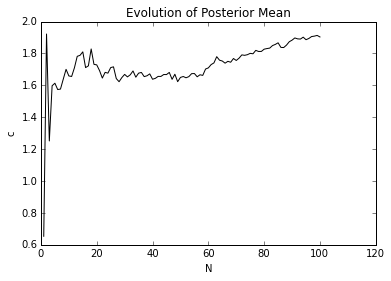

In [18]:
plt.plot(np.arange(x.size) + 1, all_c, "k")
plt.plot([1, x.size + 1], [true_mu, true_mu], "k--")
plt.xlabel("N")
plt.ylabel("c")
plt.title("Evolution of Posterior Mean")

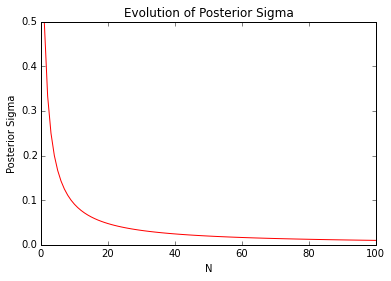

In [19]:
plt.plot(np.arange(x.size) + 1, all_d_sq, "r")
plt.xlabel("N")
plt.ylabel("Posterior Sigma")
plt.title("Evolution of Posterior Sigma")

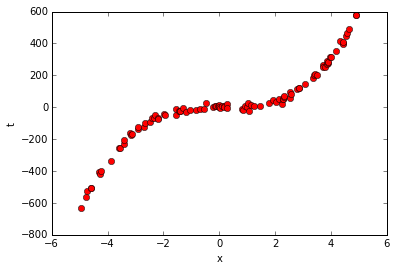

In [31]:
N = 100
x = np.sort(10*np.random.rand(N, 1)-5, axis = 0)
t = 5*x**3 - x**2 + x #create 5th order polynomial
noise_var = 150
t = t + np.random.randn(N, 1) * np.sqrt(noise_var)
plt.plot(x, t, "ro")
plt.xlabel("x")
plt.ylabel("t")
sig_sq = 1

In [32]:
test_x = np.arange(-5, 5, 0.1)[:, None]
X = np.ones_like(x)
testX = np.ones_like(test_x)
max_order = 8
log_marg_like = []

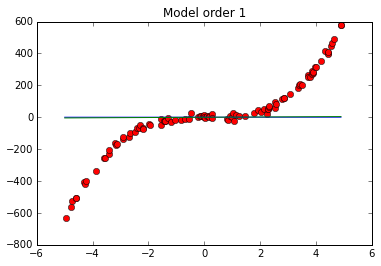

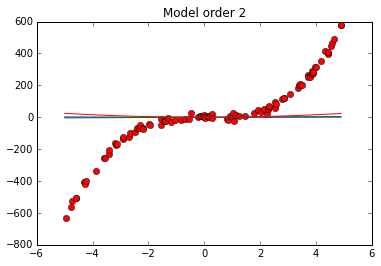

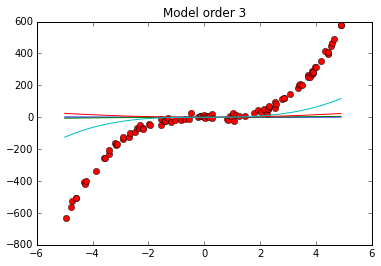

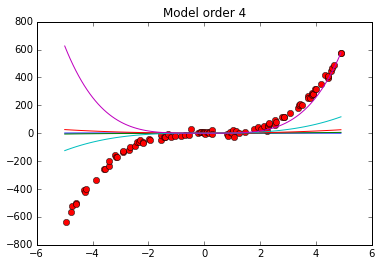

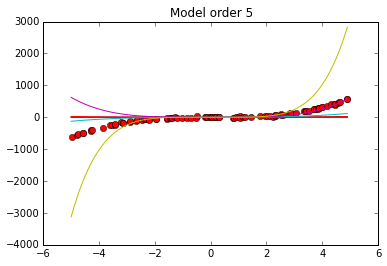

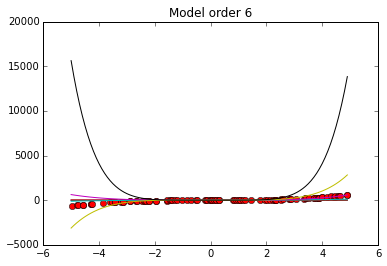

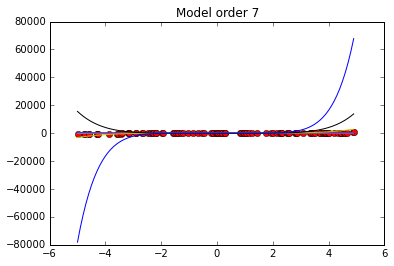

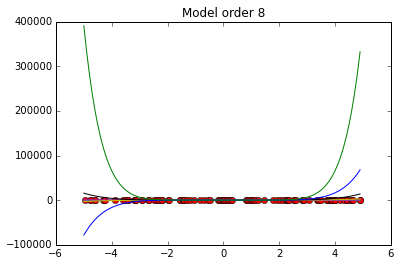

In [33]:
for i in np.arange(max_order) + 1:
    prior_mean = np.zeros((i + 1, 1))
    prior_cov = np.eye(i + 1)
    X = np.hstack((X, x**i))
    testX = np.hstack((testX, test_x**i))
    posterior_cov = np.linalg.inv((1.0/noise_var)*np.dot(X.T, X) + np.linalg.inv(prior_cov))
    posterior_mean = np.dot(posterior_cov, (1.0/noise_var)*np.dot(X.T, X) + np.dot(np.linalg.inv(prior_cov), prior_mean))
    plt.figure()
    plt.plot(x, t, "ro")
    plt.plot(test_x, np.dot(testX, posterior_mean))
    plt.title("Model order " + str(i))
    marg_cov = noise_var * np.eye(N) + np.dot(X, np.dot(prior_cov, X.T))
    marg_mean = np.dot(X, prior_mean)
    this_marg = -((i+1)/2.0)*np.log(2.0*np.pi) - 0.5*np.log(np.linalg.det(marg_cov))
    this_marg -= 0.5*np.dot((t - marg_mean).T, np.dot(np.linalg.inv(marg_cov), t - marg_mean))
    log_marg_like.append(this_marg)

Maximum marginal likelihood for order  3


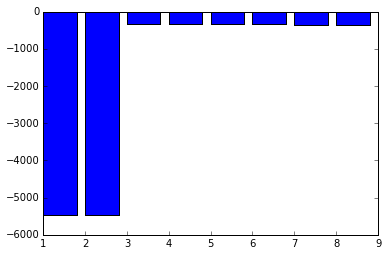

In [35]:
log_marg_like = np.array(log_marg_like)
plt.bar(np.arange(max_order) + 1, log_marg_like)
print "Maximum marginal likelihood for order ", log_marg_like.argmax() + 1

In [21]:
data = np.loadtxt('data100m.csv',delimiter=',')
x = data[:,0][:,None]
t = data[:,1][:,None]
x = x - x[0]
x = x/4.0

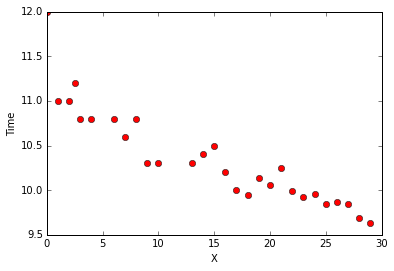

In [7]:
plt.plot(x, t, "ro")
plt.ylabel("Time")
plt.xlabel("X")

In [8]:
prior_mean = np.zeros((2, 1))
prior_cov = np.array([[100, 0], [0, 5]])
sig_sq = 2

(9, 12)

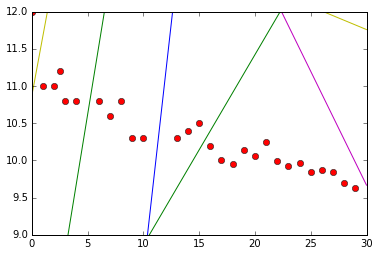

In [10]:
#sample some w vectors and plot resulting models
w_samp = np.random.multivariate_normal(prior_mean.flatten(), prior_cov, 20)
plt.figure()
plt.plot(x, t, "ro")
plot_x = np.array([[1, 0], [1, 10]])
plt.plot([0, 30], np.dot(w_samp, plot_x.T).T)
plt.ylim([9, 12])

In [11]:
def gaussian2d(mu, sigma, xvals, yvals):
    const = (1.0/(2.0*np.pi)) * (1.0 / np.sqrt(np.linalg.det(sigma)))
    si = np.linalg.inv(sigma)
    xv = xvals - mu[0]
    yv = yvals - mu[1]
    return const * np.exp(-0.5*(xv*xv*si[0][0] + xv*yv*si[1][0] + yv*xv*si[0][1] + yv*yv*si[1][1]))

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


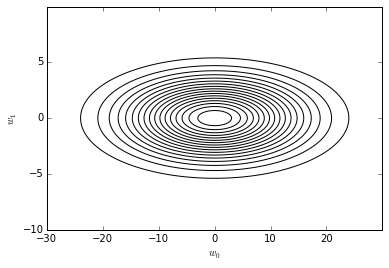

In [12]:
xp = np.arange(-30, 30, 0.1)
yp = np.arange(-10, 10, 0.1)
Xp, Yp = np.meshgrid(xp, yp)
Z = gaussian2d(prior_mean, prior_cov, Xp, Yp)
CS = plt.contour(Xp, Yp, Z, 20, colors = "k")
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")

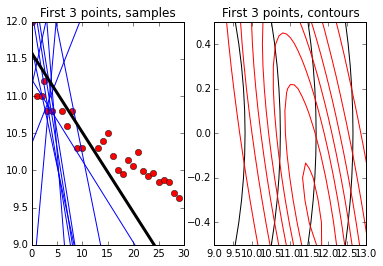

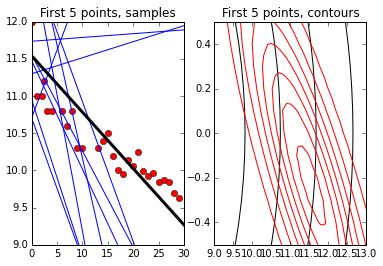

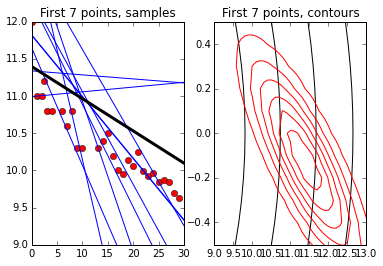

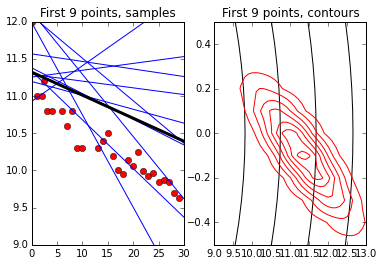

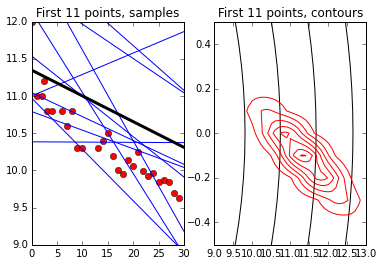

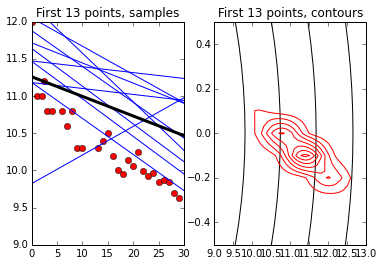

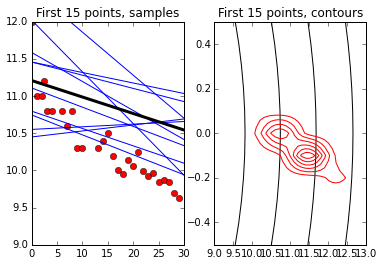

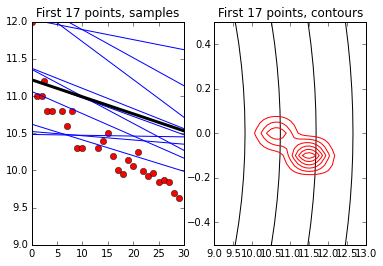

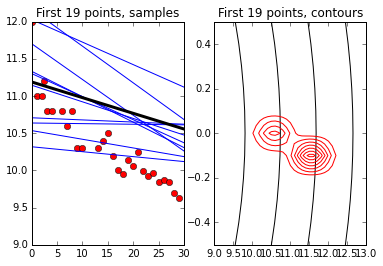

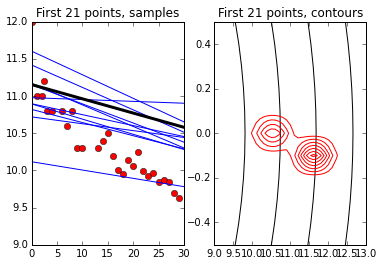

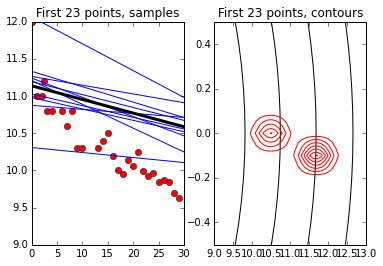

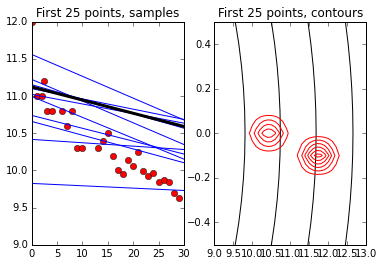

In [13]:
X = np.hstack((np.ones_like(x), x))
xpsub = np.arange(9, 13, 0.02)
ypsub = np.arange(-0.5, 0.5, 0.02)
Xpsub, Ypsub = np.meshgrid(xp, yp)
for i in np.arange(3, 27, 2):
    Xsub = X[0:i, :]
    tsub = t[0:i]
    siw = np.linalg.inv((1.0 / sig_sq)*np.dot(Xsub.T, Xsub) + np.linalg.inv(prior_cov))
    muw = np.dot(siw, (1.0/sig_sq)*np.dot(Xsub.T, tsub) + np.dot(np.linalg.inv(prior_cov), prior_mean))
    plt.figure()
    plt.subplot(1, 2, 1)
    w_samp = np.random.multivariate_normal(muw.flatten(), siw, 10)
    plt.plot(x, t, "ro")
    plt.plot([0, 30], np.dot(w_samp, plot_x.T).T, "b")
    plt.plot([0, 30], np.dot(plot_x, muw), "k", linewidth = 3)
    plt.ylim([9, 12])
    plt.title("First " + str(i) + " points, samples")
    plt.subplot(1, 2, 2)
    Zposterior = gaussian2d(muw, siw, Xpsub, Ypsub)
    CS = plt.contour(Xp, Yp, Z, 20, colors = "k")
    CS = plt.contour(Xpsub, Ypsub, Zposterior, colors = "r")
    plt.xlim([9, 13])
    plt.ylim([-0.5, 0.5])
    plt.title("First " + str(i) + " points, contours")

In [25]:
max_order = 1
test_x = np.linspace(0, 100, 100)[:, None]
X = np.ones_like(x)
testX = np.ones_like(test_x)
for i in np.arange(max_order):
    X = np.hstack((X, x**(i + 1)))
    testX = np.hstack((testX, test_x**(i+1)))

In [26]:
siw = np.linalg.inv((1.0/sig_sq)*np.dot(X.T, X) + np.linalg.inv(prior_cov))
muw = np.dot(siw, (1.0/sig_sq)*np.dot(X.T, t) + np.dot(np.linalg.inv(prior_cov), prior_mean))
predmean = np.dot(testX, muw)
predvar = sig_sq + np.diag(np.dot(testX, np.dot((siw), testX.T)))

<Container object of 3 artists>

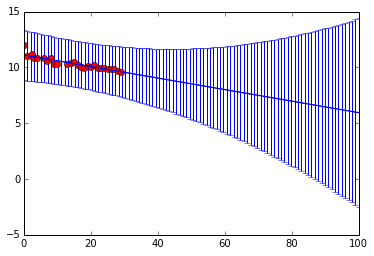

In [27]:
plt.plot(x, t, "ro")
plt.plot(test_x, predmean, "b")
plt.errorbar(test_x.flatten(), predmean.flatten(), yerr = predvar.flatten())

In [1]:
def pwin(a, b, y, N, threshold = 6):
    rs = np.linspace(0, 1, 200) #divide 0 - 1 line into 500 pieces
    posterior = [beta.pdf(r, a + y, b + N - y) for r in rs] #calculate posterior for each value of r
    pdict = zip(rs, posterior) 
    postsum = sum(posterior) #normalizing factor for posterior
    winprobs = [binom.cdf(threshold, 10, p[0])*p[1]/postsum for p in pdict] 
    #multiply probability of winning for each value of r by likelihood of each value of r
    return sum(winprobs)

In [5]:
pwin(1, 1, 38, 40)

0.01014706587100845

In [70]:
def passtest(a, b, y, N, threshold = 70):
    rs = np.linspace(0, 1, 200) #divide 0 - 1 line into 500 pieces
    posterior = [beta.pdf(r, a + y, b + N - y) for r in rs] #calculate posterior for each value of r
    pdict = zip(rs, posterior) 
    postsum = sum([p[1] for p in pdict]) #normalizing factor for posterior
    winprobs = [(1-binom.cdf(threshold, N, p[0]))*p[1]/postsum for p in pdict] 
    #multiply probability of winning for each value of r by likelihood of each value of r
    return sum(winprobs)

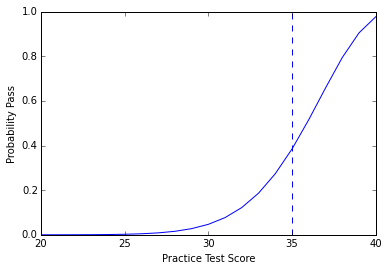

In [76]:
def graphtest(plow, phigh, N, threshold):
    practice = range(plow, phigh, 1) #range of low and high practice scores
    probs = [passtest(1, 1, p, N, threshold) for p in practice] #probability for exceeding threshold pass score
    plt.plot(practice, probs)
    plt.axvline(x = threshold, ymin=0.0, ymax=1.0, linestyle = "--")
    plt.xlabel("Practice Test Score")
    plt.ylabel("Probability Pass")
graphtest(20, 41, 40, 35)

In [82]:
from scipy.misc import comb
from scipy.special import gamma

10.0

In [83]:
def marglike(a, b, y, N):
    first = comb(N, y)
    second = gamma(a + b)/gamma(a)/gamma(b)
    third = gamma(a + y)*gamma(b + N -y) / gamma(a + b +N)
    return first * second * third

In [86]:
marglike(5, 1, 14, 20)

0.057594579333709775